# Keras Upgrade

In [1]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [71]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow' # keras의 backend로 tensorflow가 사용되게끔 하는 것

# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [72]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2024-04-01 03:33:05--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat.1’

notMNIST_small.mat. 100%[===================>] 112.14M  36.0MB/s    in 3.1s    

2024-04-01 03:33:09 (36.0 MB/s) - ‘notMNIST_small.mat.1’ saved [117586976/117586976]



In [171]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import io # mat 파일 불러오기 위함

## Data Loading

In [172]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [173]:
x = data['images']
y = data['labels']

In [174]:
x.shape, y.shape # 28*28의 18724장의 이미지

((28, 28, 18724), (18724,))

In [175]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape(-1, resolution, resolution, 1)

(18724, 28, 28)


In [176]:
# sample, x, y, channel
x.shape, y.shape # 28*28의 1개 채널짜리 18724장의 이미지

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

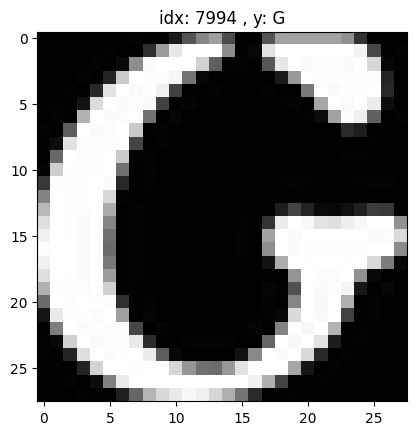

In [128]:
rand_i = np.random.randint(0, x.shape[0]) # 0 이상 18724 미만

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='gray' )
plt.show()

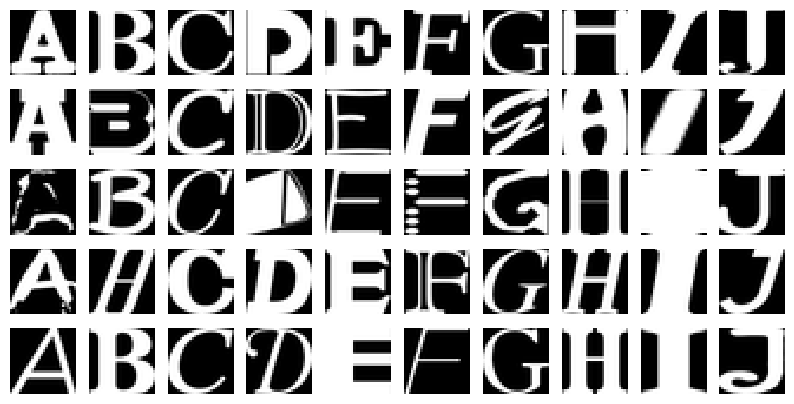

In [141]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='gray', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state=2024)

In [178]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14979, 28, 28, 1), (3745, 28, 28, 1), (14979,), (3745,))

* Scaling

    - min-max scaling

In [179]:
m = x_train.max()
n = x_train.min()
x_train = (x_train - n) / (m - n)
x_test = (x_test - n) / (m - n)

# Tabular 데이터가 아니므로 sklearn의 MinMaxScaler 쓰면 안 됨

* One-hot encoding

In [180]:
from keras.utils import to_categorical

class_n = len(np.unique(y_train))
class_n

10

In [182]:
y_train = to_categorical(y_train, num_classes = class_n)
y_test = to_categorical(y_test, num_classes = class_n)

In [185]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

* Data shape 재확인

In [186]:
x_train.shape, y_train.shape

((14979, 28, 28, 1), (14979, 10))

## Modeling
- 조건
    1. Sequential API, Functional API 중 택일
    2. Flatten Layer 사용할 것
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization 사용할 것
    4. Dropout을 0.2 정도로 사용할 것
    5. Early Stopping을 사용할 것

In [187]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

* Early stopping

In [188]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.backend import clear_session

clear_session()

model = Sequential([Input(shape = input_shape),
                    Flatten(),
                    Dense(256, activation='relu'),
                    BatchNormalization(), # 미니배치의 입력 데이터를 정규화(normalization)하여 학습을 안정화하고 빠르게 수렴할 수 있도록 도움
                    Dropout(0.2),
                    Dense(64, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(32, activation = 'relu'),
                    BatchNormalization(),
                    Dropout(0.2),
                    Dense(10, activation = 'softmax')
                   ])

In [189]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss= 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221,226 (864.16 KB)

 Trainable params: 220,522 (861.41 KB)

 Non-trainable params: 704 (2.75 KB)

In [190]:
from keras.callbacks import EarlyStopping # 과적합 방지 위함
es = EarlyStopping(monitor = 'val_loss', # early stopping의 관측 지표
                   min_delta=0.1, # 0.1보다 더 크게 변해야 성능이 나아졌다고 간주
                   patience = 5, # 성능 개선이 발생하지 않을 때 몇 epochs만큼 더 진행할 것인지
                   verbose = 1, # early stopping이 발생한 epoch 알려줌
                   restore_best_weights = True, # 최적의 가중치 가진 epoch 시점으로 가중치를 되돌림
                   )

* .fit( )

In [192]:
model.fit(x_train, y_train, validation_split=.2, epochs=10000, verbose=1, callbacks=[es])
# batch_size의 default는 32. 375번 32개 데이터들로 가중치 업데이트 수행한다는 것

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6628 - loss: 1.1133 - val_accuracy: 0.8855 - val_loss: 0.3929
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8672 - loss: 0.4798 - val_accuracy: 0.8875 - val_loss: 0.3825
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8672 - loss: 0.4625 - val_accuracy: 0.9015 - val_loss: 0.3443
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8927 - loss: 0.3814 - val_accuracy: 0.8995 - val_loss: 0.3406
Epoch 5/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8952 - loss: 0.3663 - val_accuracy: 0.8999 - val_loss: 0.3343
Epoch 6/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8959 - loss: 0.3651 - val_accuracy: 0.9059 - val_loss: 0.3240
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


Batch Gradient Descent
- Batch로 전체 학습데이터셋으로 경사하강법을 적용한다면 (Out of Memory가 발생할 수 있음)
- 하나의 데이터만 이용해서 경사하강법을 적용한다면(Stochastic Gradient Descent), 하나의 데이터가 전체 데이터를 대변한다고 보기는 어려우므로 극단적이라 볼 수 있음

=> 중간 절충이 Mini Batch Gradient Descent임 (batch = 데이터 32개)

* .evaluate( )

In [193]:
model.evaluate(x_test, y_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8849 - loss: 0.3714


[0.37498146295547485, 0.8902536630630493]

* .predict( )

In [194]:
y_pred = model.predict(x_test)

118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [197]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test, axis=1)

In [199]:
print(y_pred_arg.shape)
print(y_pred_arg[:5])

(3745,)
[0 5 3 2 1]


* 평가 지표

In [203]:
from sklearn.metrics import *

class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
print(classification_report(y_test_arg, y_pred_arg))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       360
           1       0.94      0.86      0.89       382
           2       0.89      0.94      0.91       385
           3       0.87      0.92      0.90       373
           4       0.93      0.85      0.89       364
           5       0.95      0.90      0.92       392
           6       0.87      0.88      0.87       390
           7       0.89      0.91      0.90       364
           8       0.82      0.86      0.84       360
           9       0.84      0.95      0.89       375

    accuracy                           0.89      3745
   macro avg       0.89      0.89      0.89      3745
weighted avg       0.89      0.89      0.89      3745



## Visualization

* 실제 데이터 확인

idx = 2174
해당 인덱스의 이미지는 C
모델의 예측 : C
모델의 클래스별 확률 : 
-------------------
A 0.0
B 1.0
C 77.0
D 0.0
E 7.0
F 0.0
G 1.0
H 0.0
I 11.0
J 0.0
정답


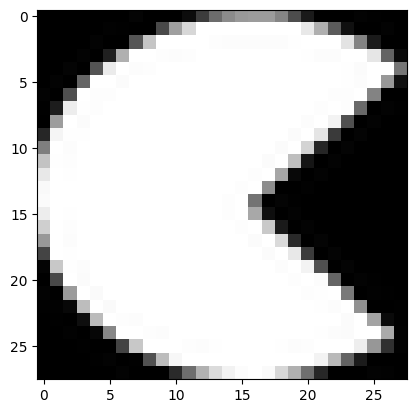

In [206]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = y_test_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if y_test_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test[rand_idx], cmap='gray')
plt.show()

* 틀린 이미지만 확인해보기

In [217]:
temp = (y_test_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

411

In [218]:
false_idx

array([   9,   20,   21,   22,   27,   29,   31,   34,   35,   44,   45,
         47,   55,   58,   72,  103,  107,  113,  117,  130,  135,  139,
        168,  172,  180,  181,  187,  215,  228,  239,  260,  265,  266,
        280,  288,  290,  292,  297,  309,  316,  317,  328,  334,  339,
        350,  365,  414,  416,  428,  446,  451,  465,  478,  483,  494,
        496,  497,  498,  508,  519,  528,  546,  561,  563,  570,  584,
        611,  626,  648,  654,  656,  664,  671,  679,  696,  707,  708,
        719,  729,  743,  751,  761,  764,  766,  791,  807,  813,  833,
        835,  841,  846,  848,  864,  868,  883,  894,  902,  904,  908,
        916,  941,  947,  949,  958,  964,  967,  976,  977,  978,  982,
        993,  994,  997, 1001, 1004, 1012, 1013, 1022, 1025, 1051, 1056,
       1070, 1082, 1088, 1089, 1091, 1095, 1101, 1123, 1135, 1146, 1149,
       1151, 1170, 1193, 1194, 1202, 1208, 1229, 1239, 1269, 1276, 1280,
       1287, 1312, 1314, 1317, 1326, 1338, 1340, 13

idx = 3481
해당 인덱스의 이미지는 I
모델의 예측 : J
모델의 클래스별 확률 : 
-------------------
A 2.0
B 6.0
C 1.0
D 13.0
E 1.0
F 1.0
G 3.0
H 5.0
I 3.0
J 60.0
땡


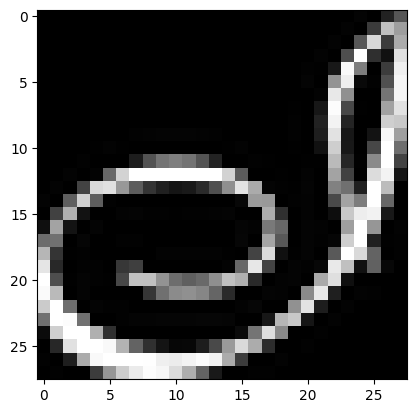

In [219]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = y_test_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if y_test_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(x_test[rand_idx], cmap='gray')
plt.show()